In [14]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json
from datetime import datetime, timedelta, date

%matplotlib inline

In [15]:
employees = [
    {"FIO": "Иванов Иван Иванович", "Position": "Менеджер", "HireDate": "2013-10-22", "Salary": 250000},
    {"FIO": "Сорокина Екатерина Матвеевна", "Position": "Аналитик", "HireDate": "2020-03-12", "Salary": 75000},
    {"FIO": "Струков Иван Сергеевич", "Position": "Старший программист", "HireDate": "2021-04-23", "Salary": 150000},
    {"FIO": "Корнеева Анна Игоревна", "Position": "Ведущий программист", "HireDate": "2015-02-22", "Salary": 120000},
    {"FIO": "Старчиков Сергей Анатольевич", "Position": "Младший программист", "HireDate": "2021-11-12", "Salary": 50000},
    {"FIO": "Бутенко Артем Андреевич", "Position": "Архитектор", "HireDate": "2010-02-12", "Salary": 200000},
    {"FIO": "Савченко Алина Сергеевна", "Position": "Старший аналитик", "HireDate": "2016-04-13", "Salary": 100000}
]


In [16]:
import csv

# Открываем файл для записи
with open('employees.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['FIO', 'Position', 'HireDate', 'Salary']

    # Создаем объект DictWriter
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Записываем заголовки
    writer.writeheader()

    # Записываем данные сотрудников
    for employee in employees:
        writer.writerow(employee)


In [17]:
class Employee:
    def __init__(self, FIO, Position, HireDate, Salary):
        self.__FIO = FIO
        self.__Position = Position
        self.__HireDate = HireDate
        self.__Salary = Salary

    @property
    def FIO(self):
        return self.__FIO

    @property
    def Position(self):
        return self.__Position

    @property
    def HireDate(self):
        return self.__HireDate

    @property
    def Salary(self):
        return self.__Salary

    @FIO.setter
    def FIO(self, value):
        self.__FIO = value

    @Position.setter
    def Position(self, value):
        self.__Position = value

    @HireDate.setter
    def HireDate(self, value):
        self.__HireDate = value

    @Salary.setter
    def Salary(self, value):
        self.__Salary = value

  #премии к дню программиста
    def calculate_programmer_bonus(self):
        # Проверяем, содержит ли позиция слово "программист"
        is_programmer = "программист" in self.Position.lower()

        # Если это программист, вычисляем премию (3% от оклада)
        programmer_bonus = self.Salary * 0.03 if is_programmer else 0

        return programmer_bonus

  #премии для женщин на 8 марта
    def calculate_march_bonus(self):
        gender = 'female' if self.FIO.lower()[-1] == 'а' else 'male'
        bonus = 2000 if gender == 'female' else 0
        return bonus

  #премии для мужчин на 23 февраля
    def calculate_february_bonus(self):
        gender = 'female' if self.FIO.lower()[-1] == 'а' else 'male'
        bonus = 2000 if gender == 'male' else 0
        return bonus

  #расчитывает индексированную зп
    def calculate_indexation(self):
        # Вычисляем разницу между текущей датой и датой найма
        hire_date = pd.to_datetime(self.HireDate)
        today = datetime.now().date()
        years_worked = (today.year - hire_date.year) - ((today.month, today.day) < (hire_date.month, hire_date.day))

        indexation = 0

        if years_worked > 10:
            SalaryAfterIndexation = self.Salary * 1.07
        elif years_worked <= 10:
            SalaryAfterIndexation = self.Salary * 1.05

        return SalaryAfterIndexation

  #отработали более 6 месяцев
    def calculate_time_in_company(self):
        hire_date = pd.to_datetime(self.HireDate)
        today = datetime.now().date()
        months_worked = (today.year - hire_date.year) * 12 + \
                         (today.month - hire_date.month) + \
                         (today.day - hire_date.day)

        if months_worked >= 6:
          is_six_months = True
        else:
          is_six_months = False

        return is_six_months

  #фонд оплаты труда на каждого сотрудника
    def culculate_fund(self):
        new_salary = self.calculate_indexation()
        programmer_bonus = self.calculate_programmer_bonus()
        february_bonus = float(self.calculate_february_bonus())
        march_bonus = float(self.calculate_march_bonus())
        total_fund = new_salary + programmer_bonus + february_bonus + march_bonus
        return total_fund

  #подоходный налог
    def calculate_tax(self):
      salary = self.culculate_fund()
      if salary*12 < 5000000:
        tax = salary*0.13
      else:
        tax = (5000000 - 12*salary)*0.15 + 5000000*0.13
      return tax

  #отчисления в фонд соц страхования
    def calculate_social_fund(self):
      salary = self.culculate_fund()
      social_fund = salary*0.3
      return social_fund

In [18]:
# Создаем список объектов Employee
employee_list = [
    Employee(FIO=emp["FIO"], Position=emp["Position"], HireDate=emp["HireDate"], Salary=emp["Salary"])
    for emp in employees
]

In [19]:
results = []
for employee in employee_list:
    result = {
        'FIO': employee.FIO,
        'Position': employee.Position,
        'HireDate': employee.HireDate,

        'Programmer Bonus': employee.calculate_programmer_bonus(),
        'February Bonus': employee.calculate_february_bonus(),
        'March Bonus': employee.calculate_march_bonus(),
        'New Salary': employee.calculate_indexation(),
        'Is six months': employee.calculate_time_in_company(),
        'Total Fund': employee.culculate_fund(),
        'Income tax': employee.calculate_tax(),
        'Social fund': employee.calculate_social_fund()
    }
    results.append(result)

# Создаем DataFrame с результатами
df = pd.DataFrame(results)

In [20]:
df

,FIO,Position,HireDate,Programmer Bonus,February Bonus,March Bonus,New Salary,Is six months,Total Fund,Income tax,Social fund
0,Иванов Иван Иванович,Менеджер,2013-10-22,0.0,2000,0,262500.0,True,264500.0,34385.0,79350.0
1,Сорокина Екатерина Матвеевна,Аналитик,2020-03-12,0.0,0,2000,78750.0,True,80750.0,10497.5,24225.0
2,Струков Иван Сергеевич,Старший программист,2021-04-23,4500.0,2000,0,157500.0,True,164000.0,21320.0,49200.0
3,Корнеева Анна Игоревна,Ведущий программист,2015-02-22,3600.0,0,2000,126000.0,True,131600.0,17108.0,39480.0
4,Старчиков Сергей Анатольевич,Младший программист,2021-11-12,1500.0,2000,0,52500.0,True,56000.0,7280.0,16800.0
5,Бутенко Артем Андреевич,Архитектор,2010-02-12,0.0,2000,0,214000.0,True,216000.0,28080.0,64800.0
6,Савченко Алина Сергеевна,Старший аналитик,2016-04-13,0.0,0,2000,105000.0,True,107000.0,13910.0,32100.0


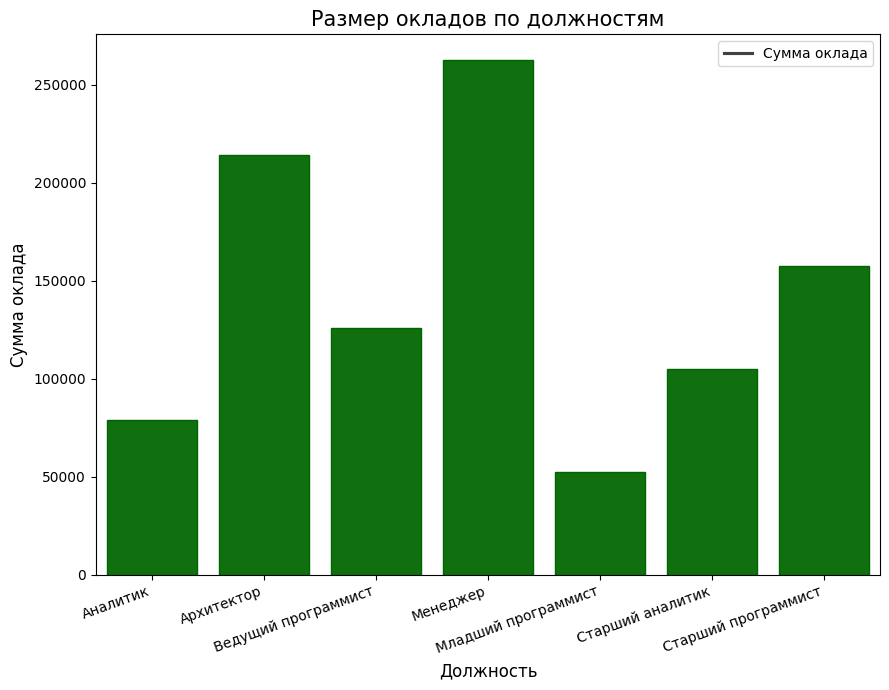

In [21]:
def create_salary_bar_chart(df):
    salary_by_position = df.groupby('Position')['New Salary'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(9, 7))
    sns.barplot(x=salary_by_position['Position'], y=salary_by_position['New Salary'],
                ax=ax, color='green', edgecolor='darkgreen')

    ax.set_title('Размер окладов по должностям', fontsize=15)
    ax.set_xlabel('Должность', fontsize=12)
    ax.set_ylabel('Сумма оклада', fontsize=12)

    for tick in ax.get_xticklabels():
        tick.set_rotation(20)
        tick.set_ha('right')

    ax.legend(['Сумма оклада'])

    plt.tight_layout()
    plt.show()

create_salary_bar_chart(df)

In [22]:
# Сохранение в CSV и JSON
def save_dataframe_to_csv_and_json(df, filename):
    df.to_csv(filename + '.csv', index=False)
    df.to_json(filename + '.json', orient='records')

filename = 'employees_new'
save_dataframe_to_csv_and_json(df, filename)